## Jargon
#### Sweep
One of six from OSP protocol. Three transverse sweeps(1-3), caudocranial direction, and three sagittal sweeps (4-6) left to right.
#### Frames
Similar to slices. Each image has 840 frames of shape 744x562.
#### Planes
A frame that is optimal (1) or suboptimal (2). Refering to the optimal plane (transverse plane of the fetal abdomen) where the manual annotation was performed. Referenced to "standard planes" in US.
#### Stack
A stack of frames (aprox 140) corresponding to one sweep, including both active images (gray, where the US probe was in contact) and detached (black, non-US frames)

In [45]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

this_path = Path().resolve()
data_path = this_path.parent.parent / 'acouslic-ai-train-set'
assert data_path.exists()

In [38]:
# read metadata csv
df = pd.read_csv(data_path / 'circumferences/fetal_abdominal_circumferences_per_sweep.csv').fillna(0)
print(len(df)), print(df.subject_id.nunique()), print(df.uuid.nunique())
df.head()

300
281
300


,uuid,subject_id,sweep_1_ac_mm,sweep_2_ac_mm,sweep_3_ac_mm,sweep_4_ac_mm,sweep_5_ac_mm,sweep_6_ac_mm
0,2e99ee0e-506a-443b-8c16-e8a0619da2f7,0,579.217706,0.0,0.0,0.0,0.000000,0.0
1,bfd442e7-9299-4890-ad3d-c9d5b6534cbc,1,0.000000,0.0,0.0,0.0,519.406363,0.0
2,0199616b-bdeb-4119-97a3-a5a3571bd641,2,624.540028,0.0,0.0,0.0,587.598341,0.0
3,dcdcb9a4-fec7-45a2-b2b7-a282f963c551,2,398.869800,0.0,0.0,0.0,0.000000,0.0
4,484c03b0-441d-4966-b10e-06b31d84e55e,3,614.922733,0.0,0.0,0.0,0.000000,0.0


In [29]:
dup_subid = df.subject_id.duplicated()
df.iloc[dup_subid[dup_subid].index]

,uuid,subject_id,sweep_1_ac_mm,sweep_2_ac_mm,sweep_3_ac_mm,sweep_4_ac_mm,sweep_5_ac_mm,sweep_6_ac_mm
3,dcdcb9a4-fec7-45a2-b2b7-a282f963c551,2,398.869800,0.000000,0.000000,0.000000,0.000000,0.000000
6,d15a282b-25ca-40ab-915c-215335a0d3cf,4,468.869376,0.000000,0.000000,0.000000,0.000000,0.000000
8,6fcb175f-52e4-4f3e-9956-f693b28f56e6,5,539.273230,0.000000,0.000000,0.000000,593.227437,0.000000
11,47540baa-7ab8-425a-9e77-8005cb1c02f4,7,0.000000,0.000000,0.000000,0.000000,0.000000,625.315015
14,f1fcabfc-f998-44c7-8420-c7a5ae5aaab7,9,347.865287,0.000000,0.000000,0.000000,0.000000,0.000000
16,30555893-2ac6-45c9-b404-8ca2d9f90b05,10,0.000000,468.458321,0.000000,0.000000,0.000000,0.000000
18,acac6afb-e374-47a7-8954-d4ed87dd55df,11,462.019562,413.044932,0.000000,0.000000,0.000000,0.000000
48,685ebd4e-483d-4b2f-8e35-d05de68d0cd6,40,581.788537,0.000000,0.000000,0.000000,0.000000,0.000000
111,3bd64075-6e7e-463d-86e1-19071f04327c,102,421.584846,0.000000,0.000000,0.000000,0.000000,0.000000
206,f5a702f0-d759-4b53-8215-462e8145e638,196,285.427803,281.834202,289.114157,0.000000,0.000000,0.000000


In [39]:
for sweep in range(1, 7):
    # print(sweep)
    df[f'sweep_{sweep}_ac_mm'] = df[f'sweep_{sweep}_ac_mm'] > 0

In [40]:
df.head()

,uuid,subject_id,sweep_1_ac_mm,sweep_2_ac_mm,sweep_3_ac_mm,sweep_4_ac_mm,sweep_5_ac_mm,sweep_6_ac_mm
0,2e99ee0e-506a-443b-8c16-e8a0619da2f7,0,True,False,False,False,False,False
1,bfd442e7-9299-4890-ad3d-c9d5b6534cbc,1,False,False,False,False,True,False
2,0199616b-bdeb-4119-97a3-a5a3571bd641,2,True,False,False,False,True,False
3,dcdcb9a4-fec7-45a2-b2b7-a282f963c551,2,True,False,False,False,False,False
4,484c03b0-441d-4966-b10e-06b31d84e55e,3,True,False,False,False,False,False


In [52]:
df.drop(columns=['uuid', 'subject_id']).sum(axis=1).value_counts()

1    127
2    108
3     50
4     15
Name: count, dtype: int64

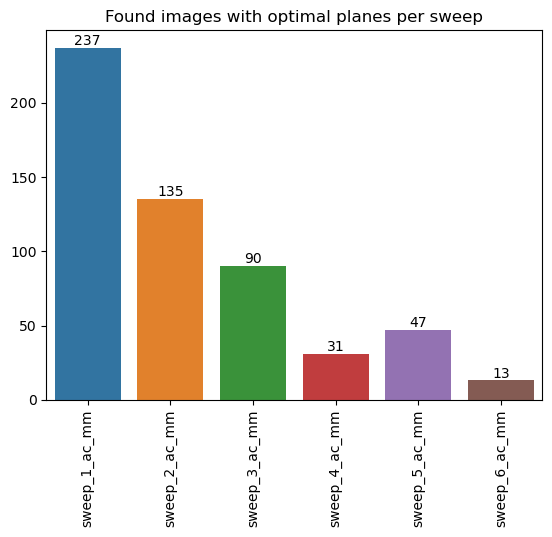

In [49]:
df_to_plot = df.drop(columns=['uuid', 'subject_id']).sum()
ax = sns.barplot(x=df_to_plot.index, y=df_to_plot.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Found images with optimal planes per sweep')
plt.show()